#### Etapa 1
- Nosso conjunto de dados é o Seeds
- Foi sugerido retirar 1 ou 2 atributos para o trabalho

Realizar a importação dos dados a partir do CSV e definir os nomes das colunas 

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Nomes das colunas
column_names = [
    "Área",
    "Perímetro",
    "Compacidade",
    "Comprimento_grão",
    "Largura_grão",
    "Coeficiente_assimetria",
    "Comprimento_sulco",
    "Classe"
]

# Leitura do CSV original
csv_file = 'seeds_dataset.csv'
df_original = pd.read_csv(csv_file, header=None, delim_whitespace=True, names=column_names)



C:\Users\Beatriz\AppData\Local\Temp\ipykernel_24836\1881382511.py:20: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_original = pd.read_csv(csv_file, header=None, delim_whitespace=True, names=column_names)


Imprimir informações básicas sobre o dataset. Essa etapa é importante para compreender a estrutura dos dados antes de iniciar as modificações e análises posteriores

In [45]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Área                    210 non-null    float64
 1   Perímetro               210 non-null    float64
 2   Compacidade             210 non-null    float64
 3   Comprimento_grão        210 non-null    float64
 4   Largura_grão            210 non-null    float64
 5   Coeficiente_assimetria  210 non-null    float64
 6   Comprimento_sulco       210 non-null    float64
 7   Classe                  210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.3 KB


Uma verificação importante a ser feita é ver como está a distribuição das classes do dataset

A coluna "Classe" representa os rótulos do conjunto de dados. Como queremos descobrir padrões e estruturas sem usar a informação de rótulo, ou seja, a abordagem é não supervisionada. Removendo a coluna "Classe", garantimos que o algoritmo não seja influenciado por essa informação e possa identificar os grupos baseados somente nas características dos dados.



In [46]:
df_original['Classe'].value_counts()

Classe
1    70
2    70
3    70
Name: count, dtype: int64

Nesta etapa, removemos a coluna "Perímetro" (além de "Classe") para criar um conjunto modificado dos dados

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X = df_original.drop(columns=["Perímetro", "Classe"])
y = df_original["Classe"]


---------------------

#### Etapa 2
- Aplicar uma técnica de classificação: KNN
- Aplicar uma técnica de agrupamento: K-médias

Em seguida, separamos as features (X) dos rótulos (y) e dividimos os dados em conjuntos de treinamento e teste. O StandardScaler é utilizado para normalizar os dados, etapa essencial para o funcionamento adequado do algoritmo KNN que será aplicado para a tarefa de classificação


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

In [59]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do KNN: {accuracy:.4f}")

Acurácia do KNN: 0.9048


Aqui, aplicamos o modelo KNN utilizando os dados originais. O modelo é treinado com os dados de treinamento e avaliado em termos de acurácia a partir do conjunto de teste

In [50]:
X_full = df_original.drop(columns=["Classe"])
y_full = df_original["Classe"]

X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do KNN: {accuracy:.4f}")

Acurácia do KNN: 0.9048


Como obtemos a mesma acurácia para ambos, isso pode significar que o atributo que escolhemos para remover (Perímetro) é irrelevante, já que o desempenho se mostrou o mesmo

Se realizarmos o teste retirando outro atributo, a acurácia muda. Por exemplo, se retirarmos a Compacidade ao invés do Perímetro

In [64]:
X_teste = df_original.drop(columns=["Compacidade", "Classe"])
y_teste = df_original["Classe"]

X_train, X_test, y_train, y_test = train_test_split(X_teste, y_teste, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do KNN: {accuracy:.4f}")

Acurácia do KNN: 0.9206


Quando o conjunto modificado apresenta acurácia melhor do que o conjunto original, isso pode indicar que o atributo removido estava introduzindo ruído ou informações redundantes. Ao eliminar essas variáveis que não contribuem com a capacidade do modelo de aprender padrões relevantes, o modelo consegue focar melhor na informação útil, resultando em um melhor desempenho na classificação

------------------------------

#### Técnica de agrupamento: K-médias

Nesta parte, removemos as colunas "Perímetro" e "Classe" para evitar a interferência dos rótulos (que não devem ser usados em técnicas não supervisionadas). Em seguida, os dados são normalizados e o algoritmo K‑Médias é aplicado para formar dois clusters (o número de clusters pode ser ajustado conforme necessário). O Silhouette Score é calculado para avaliar a qualidade dos agrupamentos e, através de PCA, os clusters são visualizados em um gráfico de dispersão.

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Score: 0.4419


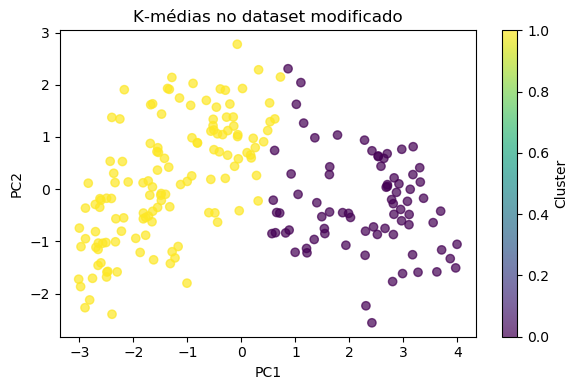

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
X = df_original.drop(columns=["Perímetro", "Classe"])

# Escalonamento dos dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Definindo o número de clusters (aqui usamos 2 como exemplo)
n_clusters = 2

# Aplicando KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(X_scaled)

sil = silhouette_score(X_scaled, labels)
print(f"Silhouette Score: {sil:.4f}")

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(6, 4))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap="viridis", alpha=0.7)
plt.title("K‑médias no dataset modificado")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(scatter, label="Cluster")
plt.tight_layout()
plt.show()

Neste último trecho, mantemos todas as colunas dos dados (exceto "Classe", que é removida para evitar vazamento de informação) e aplicamos o mesmo procedimento de escalonamento, clusterização e avaliação dos grupos formados. Essa etapa possibilita a comparação entre o agrupamento obtido a partir do conjunto original e o conjunto modificado, permitindo uma análise comparativa dos resultados.

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Score: 0.4615


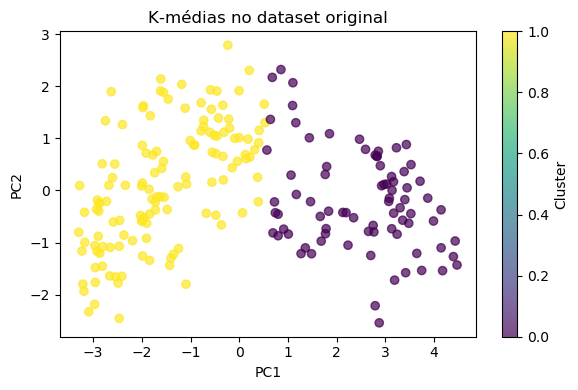

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

X_full = df_original.drop(columns=["Classe"])

scaler = StandardScaler()
X_scaled_full = scaler.fit_transform(X_full)

n_clusters = 2

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(X_scaled_full)

sil = silhouette_score(X_scaled_full, labels)
print(f"Silhouette Score: {sil:.4f}")

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled_full)

plt.figure(figsize=(6, 4))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap="viridis", alpha=0.7)
plt.title("K‑médias no dataset original")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(scatter, label="Cluster")
plt.tight_layout()
plt.show()

Quando o Silhouette Score do conjunto original é maior do que o do conjunto modificado, isso sugere que os clusters formados com as features originais estão mais  separados. Os atributos removidos podem ter contribuído para uma melhor definição dos grupos, e sua retirada gerou em uma estrutura de agrupamento menos distinta 

Se refizermos o teste mas agora retirando a Compacidade

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Score: 0.5203


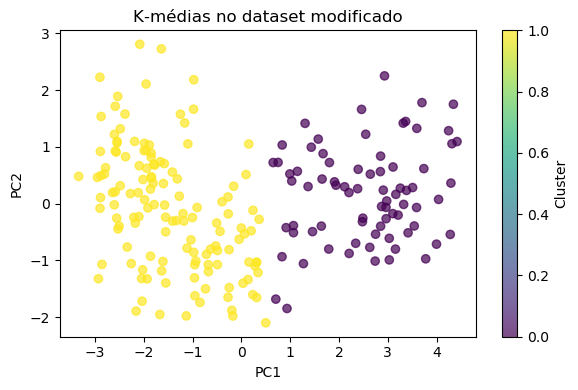

In [ ]:

X = df_original.drop(columns=["Compacidade", "Classe"])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

n_clusters = 2

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(X_scaled)


sil = silhouette_score(X_scaled, labels)
print(f"Silhouette Score: {sil:.4f}")

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(6, 4))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap="viridis", alpha=0.7)
plt.title("K‑médias no dataset modificado")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(scatter, label="Cluster")
plt.tight_layout()
plt.show()

Aconteceu da mesma forma que na classificação, o Silhouette Score ficou melhor nesse conjunto modificado, indicando que a remoção de Compacidade melhorou a estrutura dos grupos, deixando melhor separados